### Lab Report – Hierarchical & DBSCAN Clustering

**Name:** Aayush Suthar  
**Reg No:** 23FE10CAI00275  
**Section:**  5 F

---

### Aim

To apply Hierarchical Agglomerative Clustering and DBSCAN on the Diabetes dataset and visualize the clusters.

---

### Objectives
	•	Perform unsupervised clustering
	•	Visualize clusters from two methods
	•	Compare hierarchical vs density-based clustering

# Theory 

 ### Hierarchical Agglomerative Clustering
	•	Bottom-up approach
	•	Each point starts as its own cluster
	•	Gradually merges closest clusters
	•	Dendrogram used to visualize merging steps

### DBSCAN (Density-Based Spatial Clustering)
	•	Forms clusters based on density of points
	•	Detects arbitrary shaped clusters
	•	Can detect noise / outliers
	•	Parameters:
	•	eps: distance threshold
	•	min samples: minimum points to form cluster
----
### Objective
Hierarchical
Shows cluster structure, dendrogram
Must choose cut point

DBSCAN
Detects noise & irregular clusters

---
###  Hierarchical Agglomerative Clustering


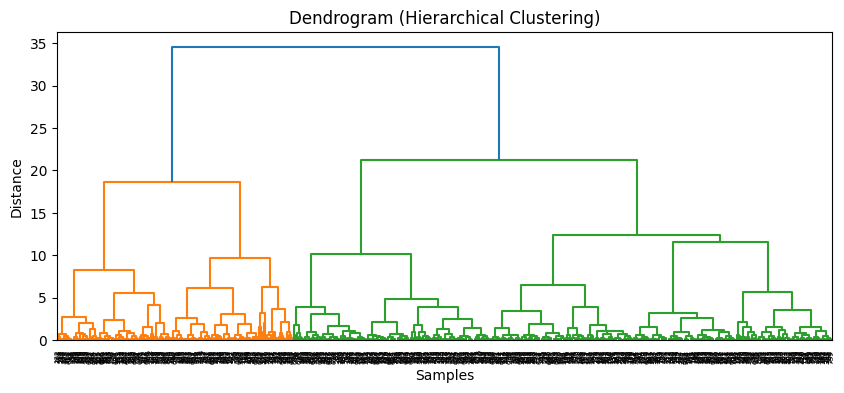

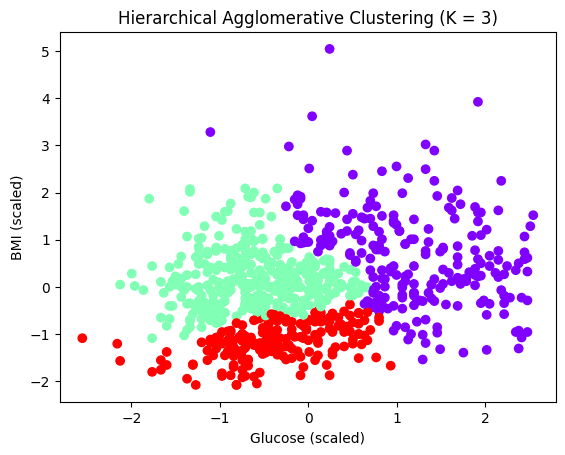

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("Diabetes Cleaned.csv")

# Select features
X = df[['Glucose', 'BMI']].values

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==== Dendrogram ====
plt.figure(figsize=(10,4))
dendrogram(linkage(X_scaled, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# ==== Agglomerative Clustering ====
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = hc.fit_predict(X_scaled)

# ==== Visualization ====
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='rainbow')
plt.title("Hierarchical Agglomerative Clustering (K = 3)")
plt.xlabel("Glucose (scaled)")
plt.ylabel("BMI (scaled)")
plt.show()

---
### DBSCAN

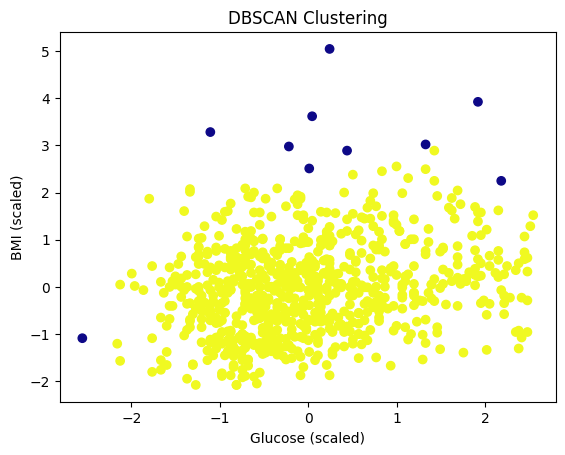

In [4]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
labels_db = db.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_db, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Glucose (scaled)')
plt.ylabel('BMI (scaled)')
plt.show()

---

### Conclusion

Both clustering methods successfully grouped Diabetes patients based on Glucose and BMI.
	•	Hierarchical gives clear cluster merging insight via dendrogram
	•	DBSCAN detected noise/outliers and formed flexible cluster shapes

DBSCAN is useful for real-world medical data due to its ability to identify abnormal patients as outliers.

---
